In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from preprocessing import StandardScaler, Split
from model import Regressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
epochs = 500
batch_size = 512
best_model = np.inf
timesteps = 90

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
x = []
y = []
for i in range(timesteps, data.shape[0]):
    x.append(data[i-timesteps:i])
    y.append(data[i])
x = np.array(x).reshape(-1, 45, 1, 2)
y = np.array(y).reshape(-1, 1)

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [6]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [7]:
x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).to(device)
x_val = torch.FloatTensor(x_val).to(device)
y_val = torch.FloatTensor(y_val).to(device)
x_test = torch.FloatTensor(x_test).to(device)

In [8]:
dataset = Data.TensorDataset(x_train, y_train)
dataloader = Data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [9]:
model = Regressor().to(device)
print(model)

Regressor(
  (cnn): Conv1d(1, 16, kernel_size=(2,), stride=(1,), padding=(1,))
  (maxpool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (ft): Flatten(start_dim=2, end_dim=-1)
  (lstm): LSTM(16, 16, batch_first=True)
  (sequential): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [11]:
history = dict()
history['loss'] = []
history['val_loss'] = []
filepath = 'checkpoint.pt'
for epoch in range(epochs):
    if epoch == 300:
        model = torch.load(filepath)
        optimizer = torch.optim.SGD(model.parameters(), lr=0.002)
    for x_batch, y_batch in dataloader:
        model.train()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():
        model.eval()
        y_pred = model(x_val)
        val_loss = criterion(y_pred, y_val)
    print(f'epoch:{epoch + 1:03d}-loss:{loss.item():.5f}-val_loss:{val_loss.item():.5f}')
    history['loss'].append(loss.item())
    history['val_loss'].append(val_loss.item())
    if val_loss.item() <= best_model:
        best_model = val_loss
        torch.save(model, filepath)
        print('weight saved')
model = torch.load(filepath)

epoch:001-loss:0.23040-val_loss:0.04994
weight saved
epoch:002-loss:0.01785-val_loss:0.00601
weight saved
epoch:003-loss:0.00793-val_loss:0.00240
weight saved
epoch:004-loss:0.00366-val_loss:0.00074
weight saved
epoch:005-loss:0.00341-val_loss:0.00080
epoch:006-loss:0.00235-val_loss:0.00066
weight saved
epoch:007-loss:0.00178-val_loss:0.00073
epoch:008-loss:0.00137-val_loss:0.00063
weight saved
epoch:009-loss:0.00131-val_loss:0.00058
weight saved
epoch:010-loss:0.00208-val_loss:0.00058
weight saved
epoch:011-loss:0.00220-val_loss:0.00052
weight saved
epoch:012-loss:0.00132-val_loss:0.00051
weight saved
epoch:013-loss:0.00257-val_loss:0.00050
weight saved
epoch:014-loss:0.00117-val_loss:0.00046
weight saved
epoch:015-loss:0.00222-val_loss:0.00044
weight saved
epoch:016-loss:0.00135-val_loss:0.00043
weight saved
epoch:017-loss:0.00152-val_loss:0.00042
weight saved
epoch:018-loss:0.00083-val_loss:0.00039
weight saved
epoch:019-loss:0.00121-val_loss:0.00037
weight saved
epoch:020-loss:0.00

epoch:189-loss:0.00082-val_loss:0.00014
weight saved
epoch:190-loss:0.00040-val_loss:0.00017
epoch:191-loss:0.00050-val_loss:0.00015
epoch:192-loss:0.00026-val_loss:0.00020
epoch:193-loss:0.00032-val_loss:0.00033
epoch:194-loss:0.00051-val_loss:0.00031
epoch:195-loss:0.00040-val_loss:0.00024
epoch:196-loss:0.00049-val_loss:0.00028
epoch:197-loss:0.00045-val_loss:0.00016
epoch:198-loss:0.00043-val_loss:0.00016
epoch:199-loss:0.00037-val_loss:0.00014
weight saved
epoch:200-loss:0.00040-val_loss:0.00016
epoch:201-loss:0.00023-val_loss:0.00014
epoch:202-loss:0.00066-val_loss:0.00014
epoch:203-loss:0.00042-val_loss:0.00015
epoch:204-loss:0.00041-val_loss:0.00014
epoch:205-loss:0.00053-val_loss:0.00013
weight saved
epoch:206-loss:0.00098-val_loss:0.00014
epoch:207-loss:0.00055-val_loss:0.00014
epoch:208-loss:0.00043-val_loss:0.00014
epoch:209-loss:0.00060-val_loss:0.00014
epoch:210-loss:0.00053-val_loss:0.00013
weight saved
epoch:211-loss:0.00057-val_loss:0.00015
epoch:212-loss:0.00086-val_l

epoch:391-loss:0.00037-val_loss:0.00010
epoch:392-loss:0.00031-val_loss:0.00010
epoch:393-loss:0.00022-val_loss:0.00010
epoch:394-loss:0.00039-val_loss:0.00010
epoch:395-loss:0.00030-val_loss:0.00010
epoch:396-loss:0.00046-val_loss:0.00010
epoch:397-loss:0.00033-val_loss:0.00010
epoch:398-loss:0.00025-val_loss:0.00010
epoch:399-loss:0.00039-val_loss:0.00010
epoch:400-loss:0.00028-val_loss:0.00010
epoch:401-loss:0.00040-val_loss:0.00010
epoch:402-loss:0.00027-val_loss:0.00010
epoch:403-loss:0.00030-val_loss:0.00010
epoch:404-loss:0.00061-val_loss:0.00010
epoch:405-loss:0.00034-val_loss:0.00010
epoch:406-loss:0.00036-val_loss:0.00010
epoch:407-loss:0.00024-val_loss:0.00010
epoch:408-loss:0.00034-val_loss:0.00010
epoch:409-loss:0.00024-val_loss:0.00010
epoch:410-loss:0.00024-val_loss:0.00010
epoch:411-loss:0.00023-val_loss:0.00010
epoch:412-loss:0.00018-val_loss:0.00010
epoch:413-loss:0.00028-val_loss:0.00010
epoch:414-loss:0.00039-val_loss:0.00010
epoch:415-loss:0.00033-val_loss:0.00010


In [12]:
model.eval()
with torch.no_grad():
    predict = model(x_test).cpu().numpy()
    predict = scaler.inverse_transform(predict)

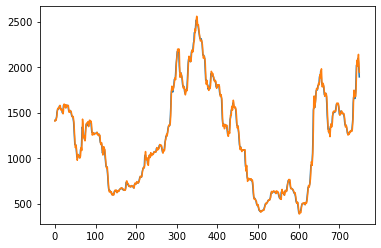

21.210141276041668


In [13]:
plt.plot(y_test)
plt.plot(predict)
plt.show()
print(metrics.mean_absolute_error(predict, y_test))

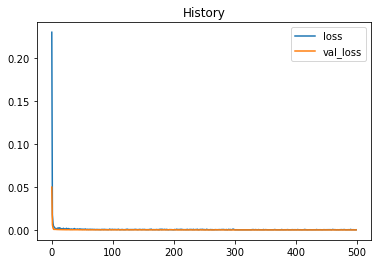

In [14]:
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.title('History')
plt.legend()
plt.show()